In [2]:
import os, sys
sys.path.append(os.path.abspath(".."))

import matplotlib.pyplot as plt
import safari
import numpy as np
import tqdm
from tqdm import tqdm
import scipy.io as sio
# inputs=np.loadtxt('Datasets/sp500/procesed.csv', delimiter=",", dtype=np.float64).T

M4File=sio.loadmat('Datasets/M4/Monthly-train_0.mat')
inputs= M4File['data']


N = 275
hippo_legs = safari.SSM(params={'N':N, 'fname':'legendre', 'meas':'scaled'})
safari_fous = safari.SSM(params={'N':N, 'fname':'fourier', 'meas':'scaled'})
# safari_fous.is_diag=False
safari_walrus = safari.SSM(params={'fname':'wavelet', 'meas':'scaled', 'wavelet_name':'db12'})


Generating Legendre basis of size  275 x 5000
Computing derivative of frame
Generating HiPPO-legS
legendre , non-diagonalizable, effective rank: 275
Generating fourier basis of size  275 x 5000
fourier scaled , diagonalizable, effective rank: 275
L: 5000 current level l: 2945
Computing derivative of frame
wavelet scaled , diagonalizable, effective rank: 275


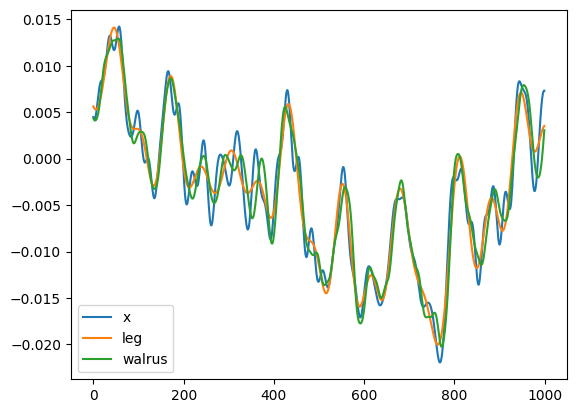

In [4]:

x_ind=0
#prepare and normalize the input signal
signal=inputs[:,x_ind] 
Seq_len=5000
signal= safari.resample(signal,Seq_len)
signal=signal/ np.linalg.norm(signal)

#Compute the states 
c_legs= safari.compute_ssm_state( hippo_legs, signal )
c_fous = safari.compute_ssm_state( safari_fous, signal )
c_walrus= safari.compute_ssm_state(safari_walrus, signal)

#find the recunstructions for the given computed state
xhat_legs = safari.reconstruct(c_legs[:,-1], Seq_len, hippo_legs.Fobj.D)
xhat_fous = safari.reconstruct(c_fous[:,-1], Seq_len, safari_fous.Fobj.D)
xhat_walrus= safari.reconstruct(c_walrus[:,-1], Seq_len, safari_walrus.Fobj.D)

## This plots reconstructions for rach inout instance
plt.figure()
plt.plot(signal[1000:2000],label='x')
plt.plot(xhat_legs[1000:2000],label='leg')
plt.plot(xhat_walrus[1000:2000],label='walrus')
plt.legend()
plt.show()
